# Исследование компьютерных игр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


### Откроем файл с данными и изучим общую информацию. 

Импортируем библиотеки pandas, matplotlib.pyplot, seaborn и numpy и сохраним их в качестве переменных pd, plt, sns и np соответственно.

In [295]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
pd.set_option('display.max_columns', None) #увеличеним максимальное количество отображаемых столбцов таблицы с данными

Откроем таблицу с данными /datasets/games.csv и сохраним ее в переменной data.

In [296]:
data = pd.read_csv('/datasets/games.csv')

Выведем первые 20 строк таблицы на экран.

In [297]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Выведем основную информацию о таблице с данными на экран и посмотрим количество ненулевых значений в каждом столбце таблицы.

In [298]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Далее проверим пропуски в данных. Выведем количество пропущенных значений в каждом столбце с помощью двух методов isna и sum.

In [299]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

С помощью метода describe() выведем статистическую информацию по каждой из колонок таблицы с данными, где в count указано количество строк в столбце, в mean - среднее значение столбца, в std - стандартное отклонение, минимальные (min) и максимальные (max) значения, а также граница каждого квартиля - 25%, 50% и 75%.

С помощью метода round сделаем округление до 1 знака после запятой.

In [300]:
round(data.describe(), 1)

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.0,16715.0,16715.0,16715.0,16715.0,8137.0
mean,2006.5,0.3,0.1,0.1,0.0,69.0
std,5.9,0.8,0.5,0.3,0.2,13.9
min,1980.0,0.0,0.0,0.0,0.0,13.0
25%,2003.0,0.0,0.0,0.0,0.0,60.0
50%,2007.0,0.1,0.0,0.0,0.0,71.0
75%,2010.0,0.2,0.1,0.0,0.0,79.0
max,2016.0,41.4,29.0,10.2,10.6,98.0


Таким образом, можно сделать вывод о том, что в таблице с данными есть пропуски данных в столбцах: name, year_of_release, genre, critic_score, user_score и rating.  

Кроме того, при выводе первых 20 строк таблицы на экран видно, что наименование столбцов таблицы не соответствует змеиному регистру - названия написаны с заглавной буквы, а правила хорошего тона говорят о том, что при наименовании столбцов лучше использовать нижний регистр.

Также было обнаружено, что тип данных в некоторых столбцах не соответствует заявленному. Например, year_of_release, user_score. 

### Предобработка данных

В первом пункте исследования при выведении первых 20 строк таблицы с данными было обнаружено, что регистр в названии столбцом не соответствует змеиному - в названии встречается верхний регистр, а хорошим тоном считается использование нижнего регистра. Приведем название столбцов к змеиному регистру с помощью метода str.lower() и проверим переименование столбцов с помощью метода columns.

In [301]:
data.columns = data.columns.str.lower()
#проверим переименование столбцов путем повторного вызова метода columns
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Следующей проверкой по предобработке данных будет проверка на дубликаты. Проверим на наличие дубликатов с помощью метода duplicated(). 

In [302]:
data.duplicated().sum()

0

Таким образом, в таблице с данными дубликатов не обнаружено. 

Ранее путем вывода методов isna и sum, было обнаружено, что в столбцах name, year_of_release, genre, critic_score, user_score и rating есть пропущенные значения. Изучим столбцы с пропущенными значениями в указанных выше колонках с помощью методов unique() и isna().

Для начала вызовем метод unique для каждого из столбцов и выведем значения на экран.

In [303]:
data['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [304]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [305]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [306]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [307]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [308]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Теперь вызовем метод isna() для каждого из столбцов с пропущенными значениями. 

In [309]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [310]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [311]:
data[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [312]:
data[data['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [313]:
data[data['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [314]:
data[data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Как видно из таблиц выше, в  строках 659 и 14244 отсутствуют данные по названию видеоигр и их жанру, а также по их рейтингу, оценке критиками и пользователями, несмотря на то, что есть информация по сумме продаж и годе выпуска. Следовательно, данные игры мы не пригодны для анализа, поэтому мы спокойно можем удалить данные строчки. 

Удаление произведем с помощью метода dropna(). 

In [315]:
data.dropna(subset = ['name', 'genre'], inplace = True)

#проверим, что удаление строк произведено путем повторного вызова метода isna()
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


В колонке year_of_release пропущено 269 значений. Хотя в названии некоторых игр и указан год, но не факт, что этот год является именно годом запуска игры. Например, строка 16711 - в игре LMA Manager 2007 в колонке год выпуска указан 2006, хотя в названии игры фигурирует цифра 2007. Или же в строке 16714 - в игре Winning Post 8 2016 в колонке год выпуска указан год выпуска 2016, как и в названии игры. 

Таким образом, целесообразнее всего удалить пропущенные значения при проведении анализа, а не проводить анализ путем присвоения приблизительных значений в годе выпуска той или иной игры. Удаление пропущенных значений также произведем с помощью метода dropna(). 



In [316]:
data.dropna(subset = ['year_of_release'], inplace = True)

#проверим, что удаление строк произведено путем повторного вызова метода isna()
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Переведем столбец year_of_release к типу int с помощью метода astype. В данном случае метод pd.to_datetime лучше не использовать, т. к. при использовании данного метода автоматически добавятся день и месяц, что для целей исследования не представляет важности, т.к. анализ проводится в разрезе годов, а не полной даты, включающей день, месяц и год выпуска игры. Поэтому в данном случае целесообразнее привести данные в данному стобце к типу int.

Приведение данных в столбце осуществим с помощью метода astype(). 

In [317]:
data['year_of_release'] = data['year_of_release'].astype('int')

При применении метода astype('float') к столбцу user_score возникла следующая ошибка: "could not convert string to float: 'tbd'". Погуглив значение tbd в интернете, было определено, что в мире компьютерных игр данная аббревиатура расшифровывается как "to be determined" и не несет никакой смысловой нагрузки с точки зрения программирования на Python, следовательно, воспринимаем ее как обычный текст, аналогичный NaN. С помощью метода replace заменим tbd на NaN. 

Попробуем перевести тип колонки user_score ко float с помощью метода pd.to_numeric.

In [318]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'] = pd.to_numeric(data['user_score'])

Повторно вызовем метод info() для оценки внедрения внесенных изменений и для понимания того, в каких столбцах все еще остались пропущенные значения.

In [319]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Как видно из info() были удалены пропущенные значения и заменен тип данных в нескольких столбцах. Также обращаем внимание на то, что в колонках critic_score и user_score также остались пропущенные значения. 

Т.к. в данных колонках содержится оценка игр критиками по стобалльной и пользователями по десятибалльным шкалам, и в этих столбцах пропущено более 50% данных и нет никакого иного способа добыть данные по рейтингу игр, предлагаю оставить пропуски как есть, т. к. если мы заполним пропуски медианными значениями, то можем существенно повлиять на распределение и, соответственно, исказить данные. 


Осталось разобраться с пропусками данных в столбце rating. 
Т. к. в столбце отсутствует чуть менее половины значений, заменим недостающие значения на unknown, т.к. в данном случае просто удалить данные мы не сможем в виду существенности данных для проведения исследования. Замену пропущенных произведем с помощью методов isnull() и fillna().

In [320]:
data.loc[data['rating'].isnull(), 'rating'] = data['rating'].fillna(value='unknown')

In [321]:
#выведем список уникальных значений столбца rating и убедимся, что внесенные изменения вступили в силу
data['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Далее посчитаем суммарные продажи во всех регионах и запишем их в столбец total_sales. 

In [322]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

Повторно вызовем методы info() и describe(), чтобы убедиться, что все внесенные изменения вступили в силу.

In [323]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 2.1+ MB


In [324]:
round(data.describe(), 0)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16444.0,16444.0,16444.0,16444.0,16444.0,7983.0,7463.0,16444.0
mean,2006.0,0.0,0.0,0.0,0.0,69.0,7.0,1.0
std,6.0,1.0,1.0,0.0,0.0,14.0,1.0,2.0
min,1980.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0
25%,2003.0,0.0,0.0,0.0,0.0,60.0,6.0,0.0
50%,2007.0,0.0,0.0,0.0,0.0,71.0,8.0,0.0
75%,2010.0,0.0,0.0,0.0,0.0,79.0,8.0,0.0
max,2016.0,41.0,29.0,10.0,11.0,98.0,10.0,83.0


Таким образом, мы выполнили предообработку данных:
- привели названия столбцов к змеиному регистру;
- изменили тип данных в столбцах year_of_release, user_score;
- заполнили пропуски данных в столбцах critic_score, user_score, rating, а в некоторых случаях произвели удаление (name, genre, year_of_release);  
- добавили столбец с данными по суммарным продажам по всем регионам.

### Исследовательский анализ данных

Проведем исследовательский анализ данных. 

Начнем анализ с изучения количества игр, выпускаемых в разные годы. 

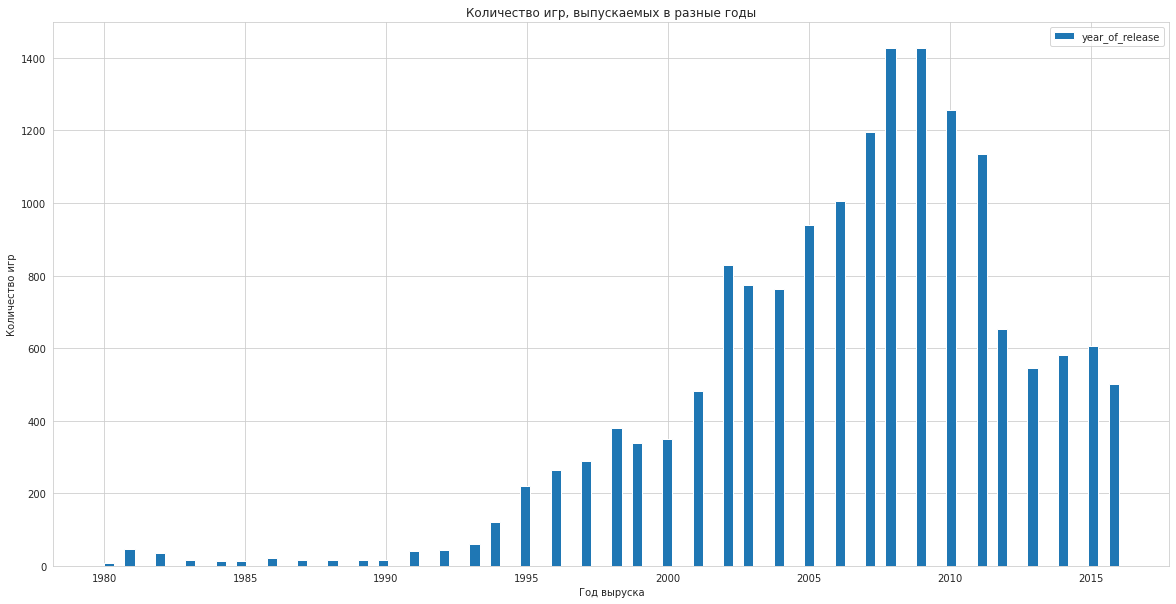

In [325]:
games_per_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()
data.plot(y='year_of_release', kind='hist', bins=100, figsize=(20, 10)).set_title('Количество игр, выпускаемых в разные годы');
plt.xlabel("Год выруска");
plt.ylabel("Количество игр");

Как видно из графика, наибольшее количество игр выпускалось в период с 2003 по 2016 гг. (от 550 до 1450 игр в год). При этом наибольшее количество игр было выпущено в 2008 - 2011 гг. (от 1050 до 1450 игр в год), а наименьшее количество игр - в период с 1980 по 1994 гг. (от 9 до 160 игр в год). 

Из графика также видно, что начиная с середины 2011 - начала 2012 года на рынке игр наблюдается снижение объема выпуска, которое продолжается вплоть до 2016 года. 

На мой взгляд для проведения исследования можно отбросить данные от 1980 до 1994 года, т. к. в этот период выпускалось наименьшее количество игр, а пользовательский интерфейс данных игр был самым наипростейшим. Известно, что графически интересные, красивые игры с интерейснейшим сюжетом как раз таки начали выпускаться, начиная с 1995 года. 

Далее проанализируем, как менялись продажи по платформам.

Для целей анализа выберите платформы с наибольшими суммарными продажами и построим диаграмму распределения по годам, а также ответим на вопрос: "За какой характерный срок появляются новые и исчезают старые платформы?"

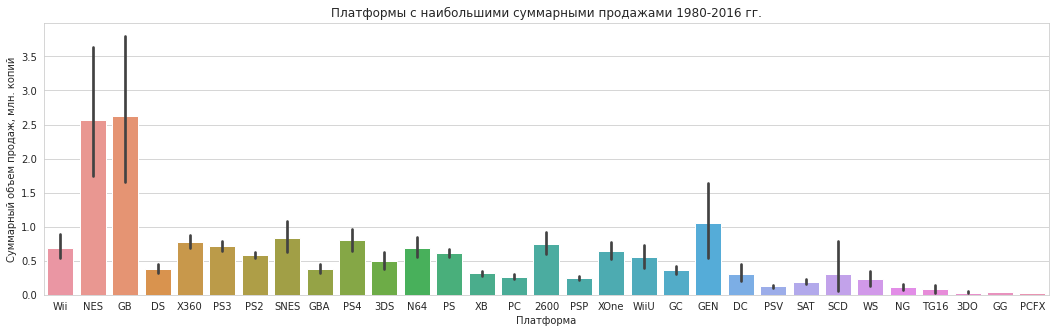

In [326]:
sns.set_style('whitegrid')
plt.figure(figsize=(18, 5))
sns.barplot(data = data, x='platform', y='total_sales').set_title('Платформы с наибольшими суммарными продажами 1980-2016 гг.');
plt.xlabel("Платформа");
plt.ylabel("Суммарный объем продаж, млн. копий");

Как видно из графика, платформами с наибольшими суммарными продажами являются GB (2,6 млн. проданных копий),  NES (2,52 млн. проданных копий), GEN (1 млн. проданных копий), SNES (0,9 млн. проданных копий), PS4 (0,85 млн. проданных копий), X360 (0,8 млн. проданных копий) и т.д. 

Построим диаграмму распределения по годам для наиболее прибыльных платформ, указанных в абзаце выше. Для определения наиболее прибыльных платформ возьмем суммарный объем выручки более 0,8 млн копий. 

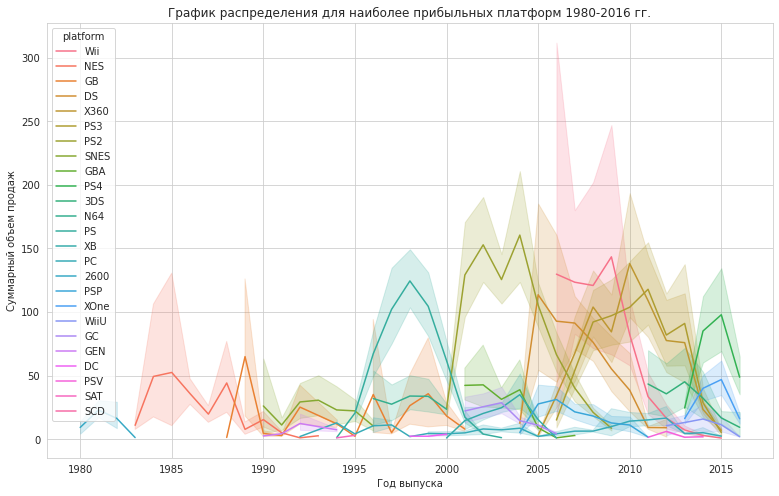

In [327]:
#создадим список с названиями наиболее прибыльных платформ top_platforms с помощью метода query()
top_platforms = data.query('total_sales >= 0.8')

#построим диаграмму распределения для наиболее прибыльных платформ
plt.figure(figsize=(13, 8))
sns.lineplot(x='year_of_release', y='total_sales', hue='platform', data=top_platforms, estimator='sum').set_title('График распределения для наиболее прибыльных платформ 1980-2016 гг.');
plt.xlabel("Год выпуска");
plt.ylabel("Суммарный объем продаж");

Однако следует обратить внимание, что в данном графике представлены платформы, начиная с 1980 г. и заканчивая 2016 г. Также видно, что такие прибыльные платформы, как NES, GB, SNES, GEN прекратили свое существование в конце 1990-х - начале 2000-х гг, продержавшись на рынке от 2 до 13 лет, а из графика "Количество игр, выпускаемых в 1980-2016 гг." видно, что развитие рынка компьютерных игр происходило начиная в 1995 г., для целей дальнейшего анализа следует построить график от 1995 до 2016 г., чтобы определить, какие платформы являются лидерами по суммарному объему продаж.

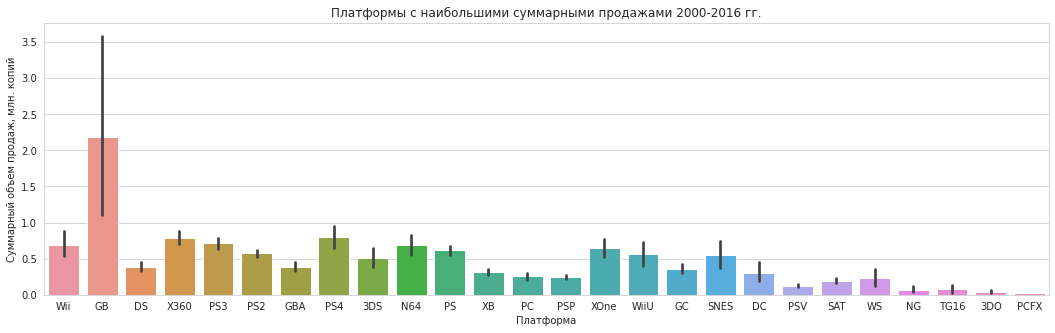

In [328]:
sns.set_style('whitegrid')
plt.figure(figsize=(18, 5))
data_from_1995 = data.query('year_of_release >= 1995')
sns.barplot(data = data_from_1995, x='platform', y='total_sales').set_title('Платформы с наибольшими суммарными продажами 2000-2016 гг.');
plt.xlabel("Платформа");
plt.ylabel("Суммарный объем продаж, млн. копий");

Таким образом видно, что платформами с наибольшими суммарными продажами, начиная с 2000 г. являются GB (около 2,2 млн. проданных копий), PS4 (0,8 млн. проданных копий), X360 (около 0,8 млн. проданных копий), PS3 (около 0,7 - 0,75 млн. проданных копий), Wii (около 0,7 млн. проданных копий), N64 (около 0,7 млн. копий), XOne (около 0,62-065 млн. копий), PS2 (около 0,6 млн. копий), WiiU (около 0,58 мнл. копий), PS (0,5 млн. копий), 3DS (0,5 млн. копий). Однако следует исключить платформу GB из выборки, т.к. она прекратила свое существование в 2001-2002 гг. 

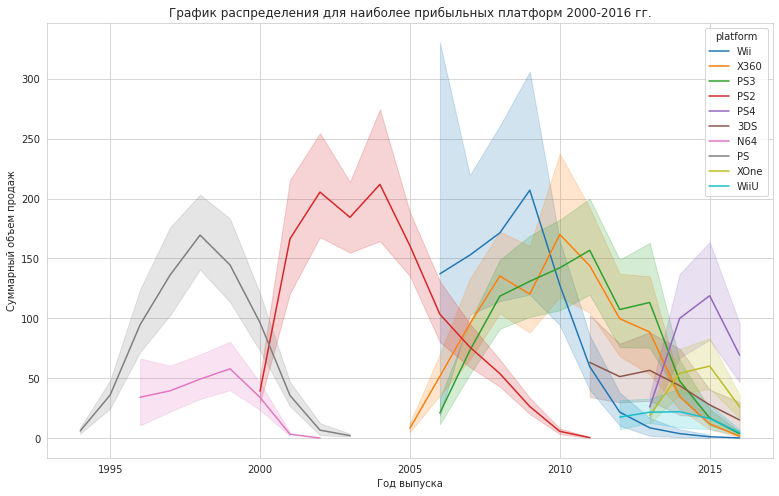

In [329]:
#создадим списки с названиями наиболее прибыльных платформ top_platforms2000_list и top_platforms_after_2000 с помощью query:
top_platforms2000_list = ['PS4', 'X360', 'PS3', 'Wii', 'XOne', 'PS2', 'WiiU', 'N64', 'PS', '3DS']
top_platforms_after_2000 = data.query('platform in @top_platforms2000_list')

#построим диаграмму распределения для наиболее прибыльных платформ
plt.figure(figsize=(13, 8))
sns.lineplot(x='year_of_release', y='total_sales', hue='platform', data=top_platforms_after_2000, estimator='sum').set_title('График распределения для наиболее прибыльных платформ 2000-2016 гг.');
plt.xlabel("Год выпуска");
plt.ylabel("Суммарный объем продаж");

Из графика видно следующее: 

1) Продажи игр на платформе PS происходили на протяжении 1994-2003 гг. (около 9,5 лет);

2) Продажи игр на платформе N64 происходили на протяжении 1996-2002 гг. (около 6 лет);

3) Продажи игр на платформе PS2 происходили на протяжении 2000-2011 гг. (около 11,5 лет)

4) Продажи игр на платформе X360 происходили на протяжении 2005-2016 гг. (около 11 лет);

5) Продажи игр на платформе Wii происходили на протяжении 2002-2015 гг. (около 13 лет);

6) Продажи игр на платформе PS3 происходили на протяжении 2002-2016 гг. (около 14 лет);

7) Продажи игр на платформе 3DS происходили на протяжении 2012-2016 гг. (около 4 лет);

8) Продажи игр на платформе WiiU происходили на протяжении 2012-2016 гг. (около 4 лет);

9) Продажи игр на платформе PS4 происходили на протяжении 2013-2016 гг. (около 3 лет);

10) Продажи игр на платформе XOne происходили на протяжении 2013-2016 гг. (около 3 лет).


Таким образом, учитывая данные по проведенному анализу платформ, характерный срок за который появляются новые и исчезают старые платформы составляет в среднем - 9-10 лет. 


Возьмем данные за соответствующий актуальный период. С точки зрения финансового прогнозирования принято брать период равный, как правило, 3-5 годам, однако для целей анализа в качестве актуального периода возьмем трехлетний срок, начиная с 2014 года и заканчивая 2016 годом. 

Данные за предыдущие периоды учитывать не будем. Сохраним данные в переменной actual_data. 

In [330]:
actual_data = data.query('year_of_release >= 2014') #создадим переменную actual_data и сохраним в ней данные от 2014 г.

Построим график распределения платформ за 2014-2016 гг. для определения платформ с растущими и падающими продажами в заданный период.

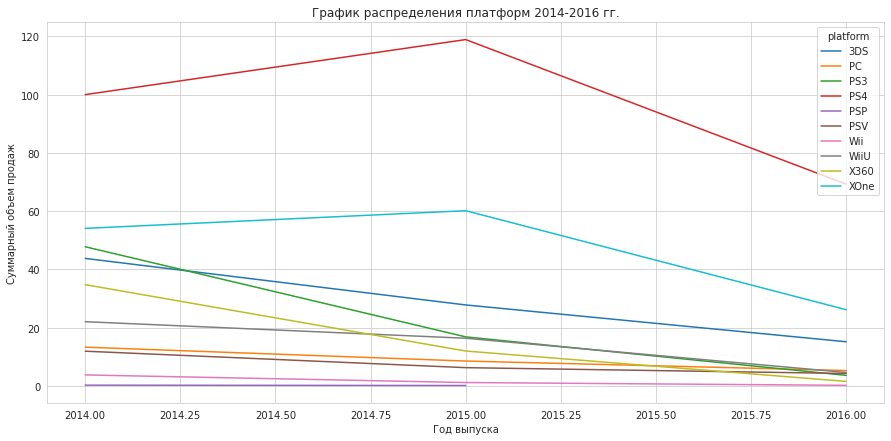

In [331]:
actual_data.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(figsize=(15,7)).set_title('График распределения платформ 2014-2016 гг.');
plt.xlabel("Год выпуска");
plt.ylabel("Суммарный объем продаж");

Как видно из графика распределения, в 2014-2016 гг. растущими платформами являются PS4 и XOne, пик продаж у которых приходился приблизительно на один и тот же период - 2015 г., остальные же платформы оказались падающими - 3DS, PC, PS3, PSP, PSV, Wii, WiiU, X360. 

Далее определим наиболее прибыльные платформы в 2014-2016 гг. путем построения диаграммы. 

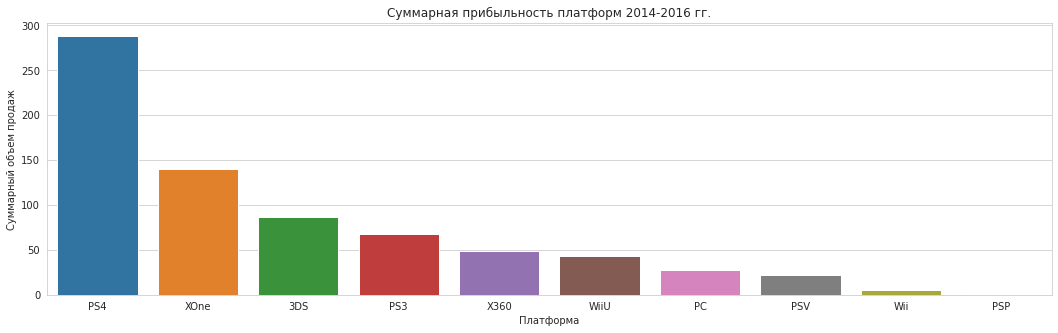

In [332]:
actual_data_pivot_table = actual_data.pivot_table(index=['platform'], values='total_sales', aggfunc='sum').reset_index().sort_values(by='total_sales', ascending=False)
sns.set_style('whitegrid');
plt.figure(figsize=(18, 5));
sns.barplot(data = actual_data_pivot_table, x='platform', y='total_sales').set_title('Суммарная прибыльность платформ 2014-2016 гг.');
plt.xlabel("Платформа");
plt.ylabel("Суммарный объем продаж");

Как видно из диаграммы выше, наиболее прибыльными платформами являются PS4, XOne, 3DS, X360, WiiU.

Таким образом, наиболее интересными с точки зрения прибыльности и роста на основании двух приведенных выше графиков являются платформы - PS4, XOne, 3DS, X360, WiiU.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

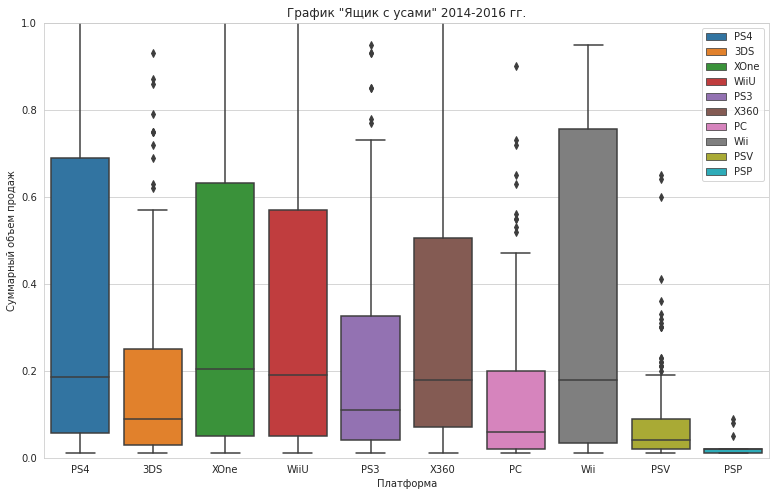

In [333]:
plt.figure(figsize=(13, 8))
sns.boxplot(x='platform', y='total_sales', data=actual_data, hue='platform', dodge=False).set_title('График "Ящик с усами" 2014-2016 гг.');
plt.xlabel("Платформа");
plt.ylabel("Суммарный объем продаж");
plt.ylim(0,1)
plt.legend()
plt.show()

Из построенного графика видно, что выделяются следующие платформы - PS4, XOne, Wii, X360, PS3 и WiiU. 

Медианное значение находится на уровне: PS4 - 0,19 млн., XOne - 0,2 млн., Wii - 0,18 млн., X360 - 0,18 млн., PS3 - 0,1 млн. и WiiU - 0,19 млн. копий.
 
Нижний квартиль (75% выше этого значения) у платформ находится на уровне: PS4, XOne, Wii, X360, PS3 и WiiU - 0,01 млн. копий.

Верхний квартиль (75% ниже этого значения) у платформ находится на уровне: PS4 - 0,69 млн., XOne - 0,63 млн., Wii - 0,73 млн., X360 - 0,7 млн., PS3 - 0,32 млн. и WiiU - 0,57 млн. копий.

Максимальное значение у платформ находится на уровне: PS4 - более 1млн., XOne - более 1 млн., Wii - 0,7 млн., X360 - более 1 млн., PS3 - 0,75 млн. и WiiU - более 1 млн. копий.  

Минимальное значение у платформ находится на уровне: PS4, XOne, Wii, X360, PS3 и WiiU - 0,01 млн. копий.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков путем построения диаграмм рассеяния и посчитаем корреляцию между отзывами и продажами. Для анализа возьмем платформу PS4 как наиболее прибыльную с точки зрения объема продаж в 2014-2016 гг. и на ее примере произведем необходимые исследования.

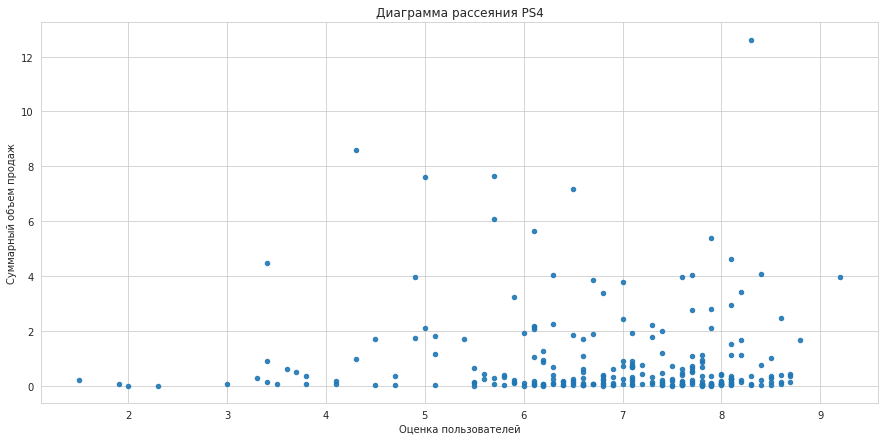

In [334]:
# выведем диаграмму рассеияния по платформе PS4, приняв во внимание отзывы пользователей
actual_data[actual_data['platform']=='PS4'].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.9, figsize=(15,7), grid=True).set_title('Диаграмма рассеяния PS4');
plt.xlabel("Оценка пользователей");
plt.ylabel("Суммарный объем продаж");
plt.show()

In [335]:
#вычислим коэффициент корреляции Пирсона в отношении пользовательских оценок для оценки зависимости от общего объема продаж
data_for_ps4_users = actual_data[actual_data['platform']=='PS4']
data_for_ps4_users_cor = data_for_ps4_users['user_score'].corr(data_for_ps4_users['total_sales'])
data_for_ps4_users_cor

-0.040131589472697356

Как видно из графика и коэффициента корреляции, между отзывами пользователей и суммарными продажами существует слабая обратная связь - всего 4,01%. 

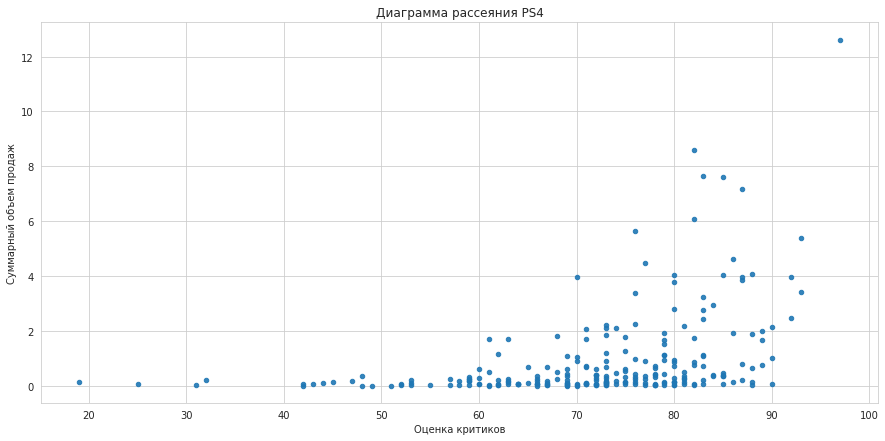

In [336]:
# выведем диаграмму рассеияния по платформе PS4, приняв во внимание отзывы критиков
actual_data[actual_data['platform']=='PS4'].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.9, figsize=(15,7), grid=True).set_title('Диаграмма рассеяния PS4');
plt.xlabel("Оценка критиков");
plt.ylabel("Суммарный объем продаж");
plt.show()

In [337]:
#вычислим коэффициент корреляции Пирсона в отношении оценок критиков для оценки зависимости от общего объема продаж
data_for_ps4_critics = actual_data[actual_data['platform']=='PS4']
data_for_ps4_critics_cor = data_for_ps4_critics['critic_score'].corr(data_for_ps4_critics['total_sales'])
data_for_ps4_critics_cor

0.40266141068104083

Как видно из графика и коэффициента корреляции для платформы PS4, между отзывами критиками и суммарными продажами существует средняя прямая связь - всего 40,26%. 

Таким образом, можно сделать вывод о том, что отзывы пользователей незначительно влияют на суммарные продажи игр, нежели отзывы критиков. В то же время можно сделать вывод о том, что и отзывы пользователей, и отзывы критиков на суммарные продажи значительного влияния не оказывают (влияют слабо).

Соотнесем выводы с продажами игр на других платформах.

In [338]:
actual_data['platform'].unique() #выведем уникальные значения столбца platform с помощью метода unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

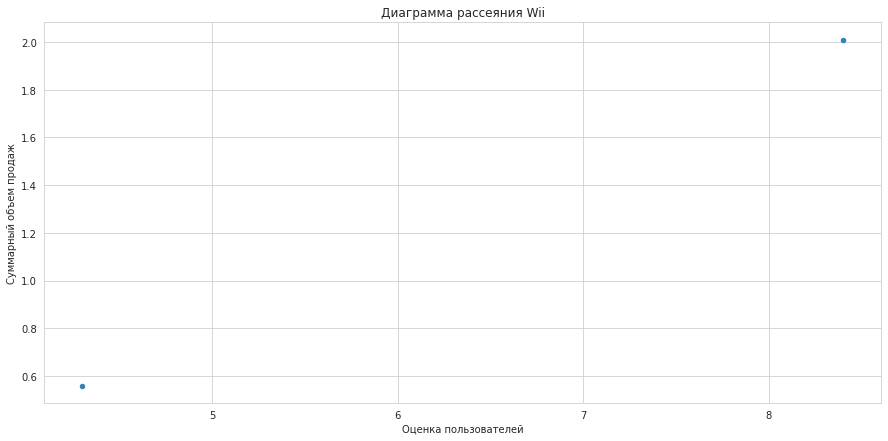

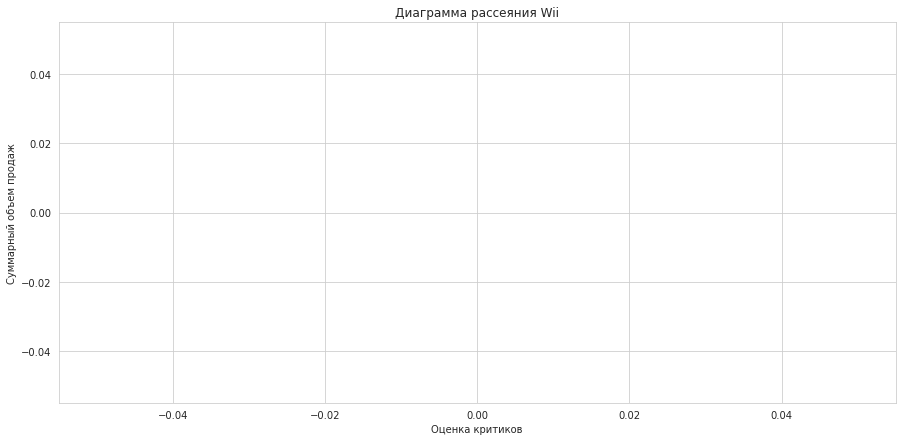

Коэффициент корреляции "оценка пользователей" - платформа "Wii": 1.0
Коэффициент корреляции "оценка критиков" - платформа "Wii": nan


In [339]:
# выведем диаграмму рассеияния по платформе Wii, приняв во внимание отзывы пользователей
actual_data[actual_data['platform']=='Wii'].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.9, figsize=(15,7), grid=True).set_title('Диаграмма рассеяния Wii');
plt.xlabel("Оценка пользователей");
plt.ylabel("Суммарный объем продаж");
plt.show()

# выведем диаграмму рассеияния по платформе Wii, приняв во внимание отзывы критиков
actual_data[actual_data['platform']=='Wii'].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.9, figsize=(15,7), grid=True).set_title('Диаграмма рассеяния Wii');
plt.xlabel("Оценка критиков");
plt.ylabel("Суммарный объем продаж");
plt.show()

#вычислим коэффициент корреляции Пирсона в отношении пользовательских оценок для оценки зависимости от общего объема продаж
data_for_wii_users = actual_data[actual_data['platform']=='Wii']
data_for_wii_users_cor = data_for_wii_users['user_score'].corr(data_for_wii_users['total_sales'])
print('Коэффициент корреляции "оценка пользователей" - платформа "Wii":', data_for_wii_users_cor)

#вычислим коэффициент корреляции Пирсона в отношении оценок критиков для оценки зависимости от общего объема продаж
data_for_wii_critics = actual_data[actual_data['platform']=='Wii']
data_for_wii_critics_cor = data_for_wii_critics['critic_score'].corr(data_for_wii_critics['total_sales'])
print('Коэффициент корреляции "оценка критиков" - платформа "Wii":', data_for_wii_critics_cor)

В отношении платформы "Wii" наблюдается сильная прямая связь между оценками пользователей 100%.

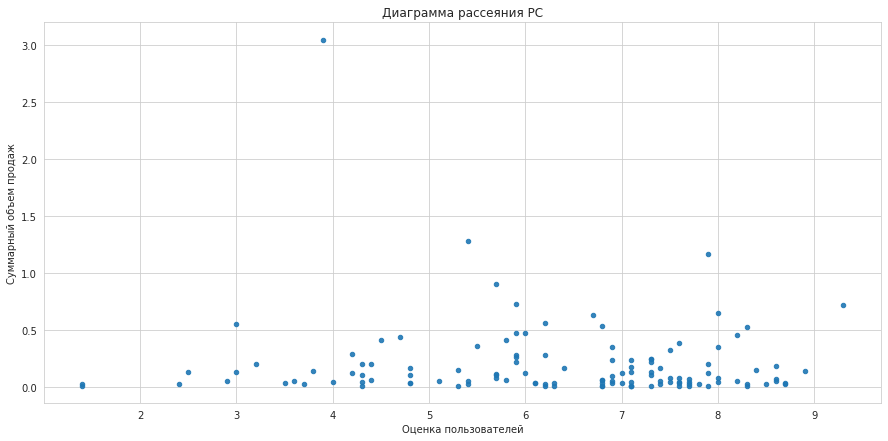

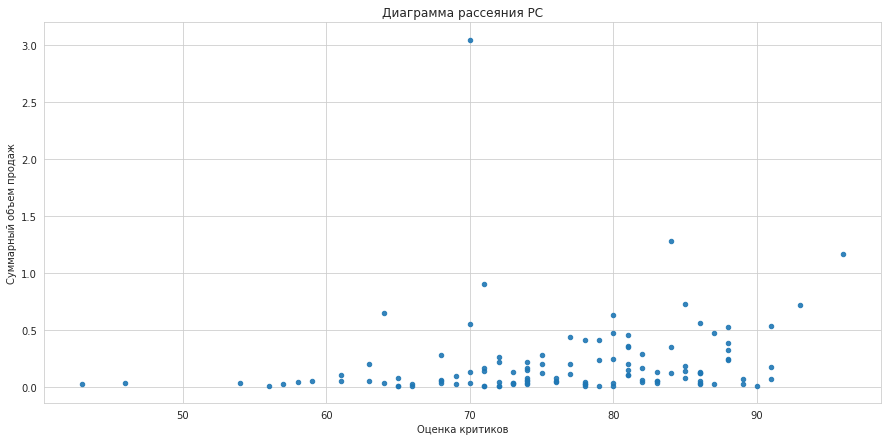

Коэффициент корреляции "оценка пользователей" - платформа "PC": -0.07159665703472451
Коэффициент корреляции "оценка критиков" - платформа "PC": 0.17463413769350036


In [340]:
# выведем диаграмму рассеияния по платформе PC, приняв во внимание отзывы пользователей
actual_data[actual_data['platform']=='PC'].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.9, figsize=(15,7), grid=True).set_title('Диаграмма рассеяния PC');
plt.xlabel("Оценка пользователей");
plt.ylabel("Суммарный объем продаж");
plt.show()

# выведем диаграмму рассеияния по платформе PC, приняв во внимание отзывы критиков
actual_data[actual_data['platform']=='PC'].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.9, figsize=(15,7), grid=True).set_title('Диаграмма рассеяния PC');
plt.xlabel("Оценка критиков");
plt.ylabel("Суммарный объем продаж");
plt.show()

#вычислим коэффициент корреляции Пирсона в отношении пользовательских оценок для оценки зависимости от общего объема продаж
data_for_pc_users = actual_data[actual_data['platform']=='PC']
data_for_pc_users_cor = data_for_pc_users['user_score'].corr(data_for_pc_users['total_sales'])
print('Коэффициент корреляции "оценка пользователей" - платформа "PC":', data_for_pc_users_cor)

#вычислим коэффициент корреляции Пирсона в отношении оценок критиков для оценки зависимости от общего объема продаж
data_for_pc_critics = actual_data[actual_data['platform']=='PC']
data_for_pc_critics_cor = data_for_pc_critics['critic_score'].corr(data_for_pc_critics['total_sales'])
print('Коэффициент корреляции "оценка критиков" - платформа "PC":', data_for_pc_critics_cor)

В отношении платформы "PC" наблюдается слабая обратная связь между оценками пользователей и слабая прямая связь между оценками критиков и суммарным объемом продаж - 7,1% и 17,4% соответственно.

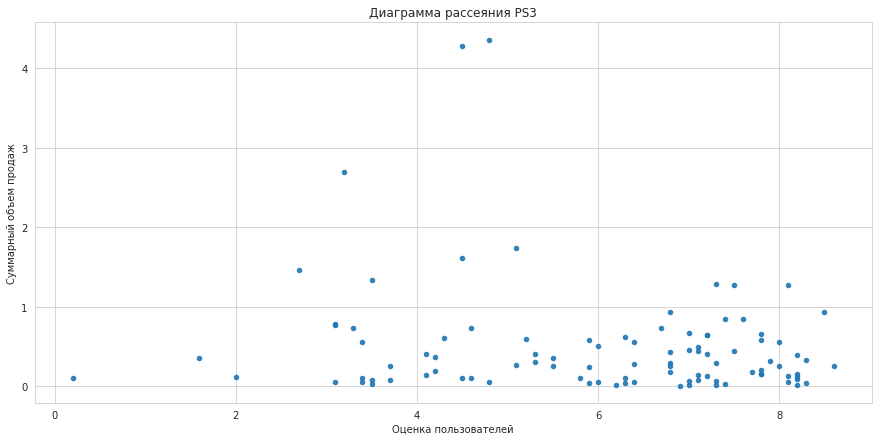

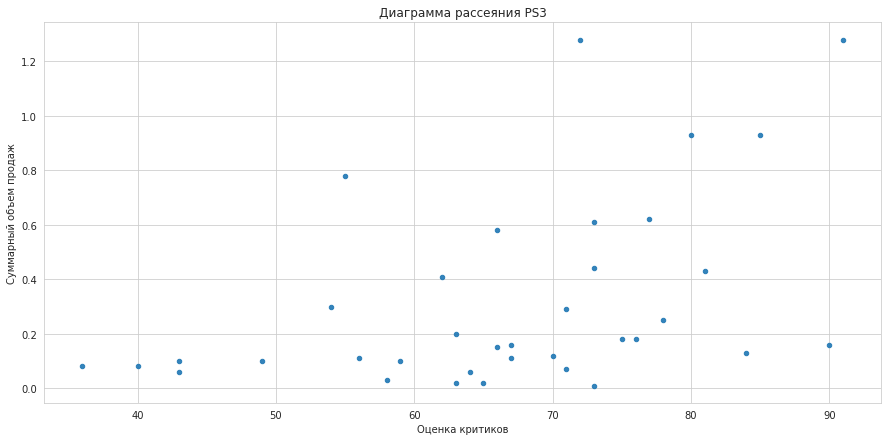

Коэффициент корреляции "оценка пользователей" - платформа "PS3": -0.16676141347662118
Коэффициент корреляции "оценка критиков" - платформа "PS3": 0.44657460493190704


In [341]:
# выведем диаграмму рассеияния по платформе PS3, приняв во внимание отзывы пользователей
actual_data[actual_data['platform']=='PS3'].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.9, figsize=(15,7), grid=True).set_title('Диаграмма рассеяния PS3');
plt.xlabel("Оценка пользователей");
plt.ylabel("Суммарный объем продаж");
plt.show()

# выведем диаграмму рассеияния по платформе PS3, приняв во внимание отзывы критиков
actual_data[actual_data['platform']=='PS3'].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.9, figsize=(15,7), grid=True).set_title('Диаграмма рассеяния PS3');
plt.xlabel("Оценка критиков");
plt.ylabel("Суммарный объем продаж");
plt.show()

#вычислим коэффициент корреляции Пирсона в отношении пользовательских оценок для оценки зависимости от общего объема продаж
data_for_ps3_users = actual_data[actual_data['platform']=='PS3']
data_for_ps3_users_cor = data_for_ps3_users['user_score'].corr(data_for_ps3_users['total_sales'])
print('Коэффициент корреляции "оценка пользователей" - платформа "PS3":', data_for_ps3_users_cor)

#вычислим коэффициент корреляции Пирсона в отношении оценок критиков для оценки зависимости от общего объема продаж
data_for_ps3_critics = actual_data[actual_data['platform']=='PS3']
data_for_ps3_critics_cor = data_for_ps3_critics['critic_score'].corr(data_for_ps3_critics['total_sales'])
print('Коэффициент корреляции "оценка критиков" - платформа "PS3":', data_for_ps3_critics_cor)

В отношении платформы "PS3" наблюдается слабая прямая связь между оценками пользователей и средняя прямая связь между оценками критиков и суммарным объемом продаж - 16,6% и 44,6% соответственно.

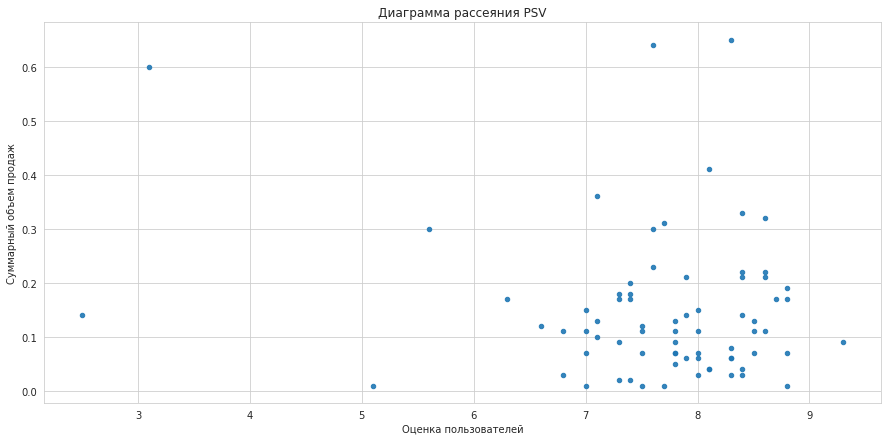

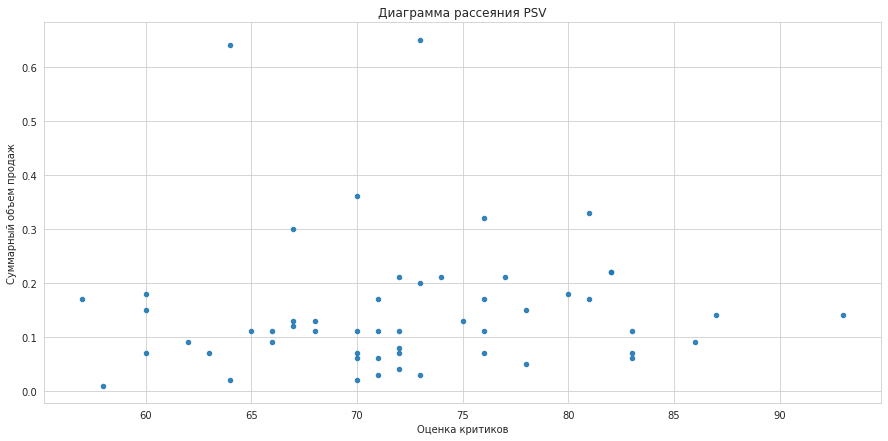

Коэффициент корреляции "оценка пользователей" - платформа "PSV": -0.16845504978064446
Коэффициент корреляции "оценка критиков" - платформа "PSV": 0.04266490657009526


In [342]:
# выведем диаграмму рассеияния по платформе PSV, приняв во внимание отзывы пользователей
actual_data[actual_data['platform']=='PSV'].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.9, figsize=(15,7), grid=True).set_title('Диаграмма рассеяния PSV');
plt.xlabel("Оценка пользователей");
plt.ylabel("Суммарный объем продаж");
plt.show()

# выведем диаграмму рассеияния по платформе PSV, приняв во внимание отзывы критиков
actual_data[actual_data['platform']=='PSV'].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.9, figsize=(15,7), grid=True).set_title('Диаграмма рассеяния PSV');
plt.xlabel("Оценка критиков");
plt.ylabel("Суммарный объем продаж");
plt.show()

#вычислим коэффициент корреляции Пирсона в отношении пользовательских оценок для оценки зависимости от общего объема продаж
data_for_psv_users = actual_data[actual_data['platform']=='PSV']
data_for_psv_users_cor = data_for_psv_users['user_score'].corr(data_for_psv_users['total_sales'])
print('Коэффициент корреляции "оценка пользователей" - платформа "PSV":', data_for_psv_users_cor)

#вычислим коэффициент корреляции Пирсона в отношении оценок критиков для оценки зависимости от общего объема продаж
data_for_psv_critics = actual_data[actual_data['platform']=='PSV']
data_for_psv_critics_cor = data_for_psv_critics['critic_score'].corr(data_for_psv_critics['total_sales'])
print('Коэффициент корреляции "оценка критиков" - платформа "PSV":', data_for_psv_critics_cor)

В отношении платформы "PSV" наблюдается слабая обратная связь между оценками пользователей и низкая прямая связь между оценками критиков и суммарным объемом продаж - 16,8% и 4,2% соответственно.

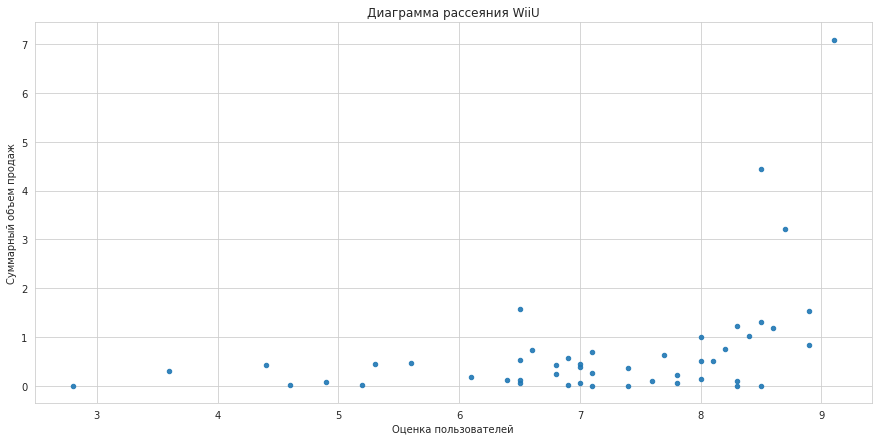

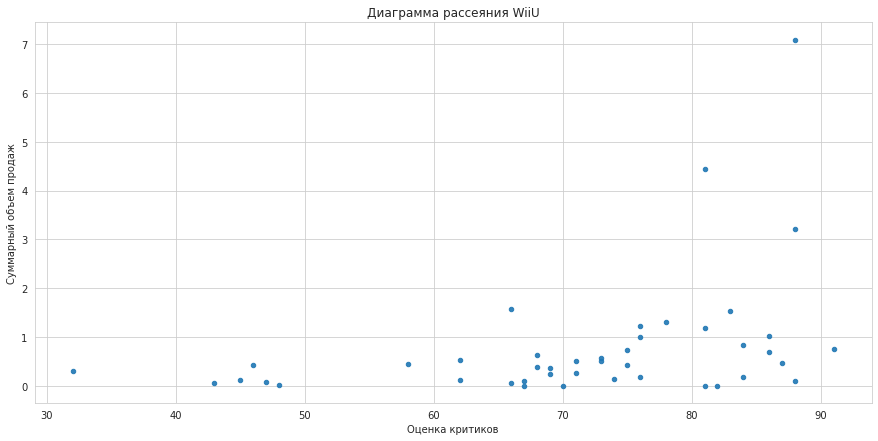

Коэффициент корреляции "оценка пользователей" - платформа "WiiU": 0.40792645792170773
Коэффициент корреляции "оценка критиков" - платформа "WiiU": 0.370201412480884


In [343]:
# выведем диаграмму рассеияния по платформе WiiU, приняв во внимание отзывы пользователей
actual_data[actual_data['platform']=='WiiU'].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.9, figsize=(15,7), grid=True).set_title('Диаграмма рассеяния WiiU');
plt.xlabel("Оценка пользователей");
plt.ylabel("Суммарный объем продаж");
plt.show()

# выведем диаграмму рассеияния по платформе WiiU, приняв во внимание отзывы критиков
actual_data[actual_data['platform']=='WiiU'].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.9, figsize=(15,7), grid=True).set_title('Диаграмма рассеяния WiiU');
plt.xlabel("Оценка критиков");
plt.ylabel("Суммарный объем продаж");
plt.show()

#вычислим коэффициент корреляции Пирсона в отношении пользовательских оценок для оценки зависимости от общего объема продаж
data_for_wiiu_users = actual_data[actual_data['platform']=='WiiU']
data_for_wiiu_users_cor = data_for_wiiu_users['user_score'].corr(data_for_wiiu_users['total_sales'])
print('Коэффициент корреляции "оценка пользователей" - платформа "WiiU":', data_for_wiiu_users_cor)

#вычислим коэффициент корреляции Пирсона в отношении оценок критиков для оценки зависимости от общего объема продаж
data_for_wiiu_critics = actual_data[actual_data['platform']=='WiiU']
data_for_wiiu_critics_cor = data_for_wiiu_critics['critic_score'].corr(data_for_wiiu_critics['total_sales'])
print('Коэффициент корреляции "оценка критиков" - платформа "WiiU":', data_for_wiiu_critics_cor)

В отношении платформы "WiiU" наблюдается средняя прямая связь между оценками пользователей критиков и суммарным объемом продаж - 40,7% и 37,0% соответственно.

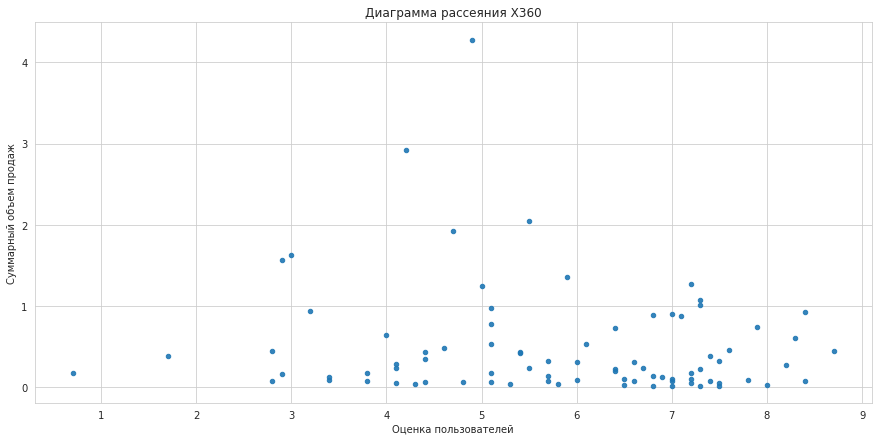

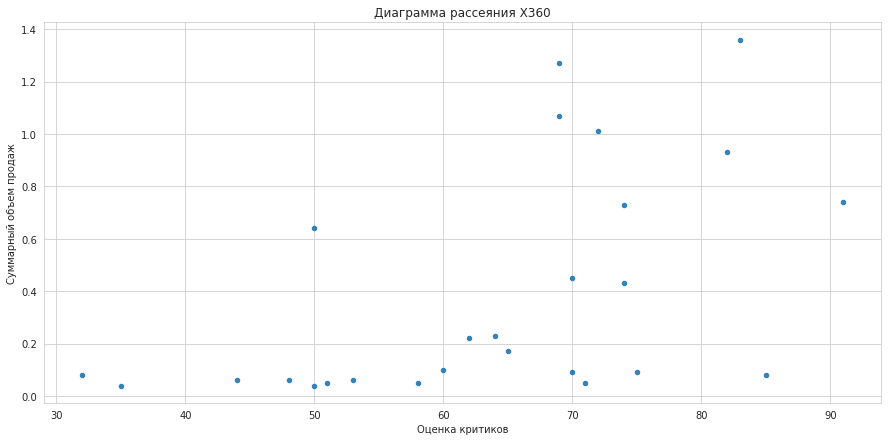

Коэффициент корреляции "оценка пользователей" - платформа "X360": -0.138444570945665
Коэффициент корреляции "оценка критиков" - платформа "X360": 0.5257228356581523


In [344]:
# выведем диаграмму рассеияния по платформе X360, приняв во внимание отзывы пользователей
actual_data[actual_data['platform']=='X360'].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.9, figsize=(15,7), grid=True).set_title('Диаграмма рассеяния X360');
plt.xlabel("Оценка пользователей");
plt.ylabel("Суммарный объем продаж");
plt.show()

# выведем диаграмму рассеияния по платформе WiiU, приняв во внимание отзывы критиков
actual_data[actual_data['platform']=='X360'].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.9, figsize=(15,7), grid=True).set_title('Диаграмма рассеяния X360');
plt.xlabel("Оценка критиков");
plt.ylabel("Суммарный объем продаж");
plt.show()

#вычислим коэффициент корреляции Пирсона в отношении пользовательских оценок для оценки зависимости от общего объема продаж
data_for_x360_users = actual_data[actual_data['platform']=='X360']
data_for_x360_users_cor = data_for_x360_users['user_score'].corr(data_for_x360_users['total_sales'])
print('Коэффициент корреляции "оценка пользователей" - платформа "X360":', data_for_x360_users_cor)

#вычислим коэффициент корреляции Пирсона в отношении оценок критиков для оценки зависимости от общего объема продаж
data_for_x360_critics = actual_data[actual_data['platform']=='X360']
data_for_x360_critics_cor = data_for_x360_critics['critic_score'].corr(data_for_x360_critics['total_sales'])
print('Коэффициент корреляции "оценка критиков" - платформа "X360":', data_for_x360_critics_cor)

В отношении платформы "X360" наблюдается слабая обратная связь между оценками пользователей и средняя прямая связь между оценками критиков и суммарным объемом продаж - 13,8% и 52,5% соответственно.

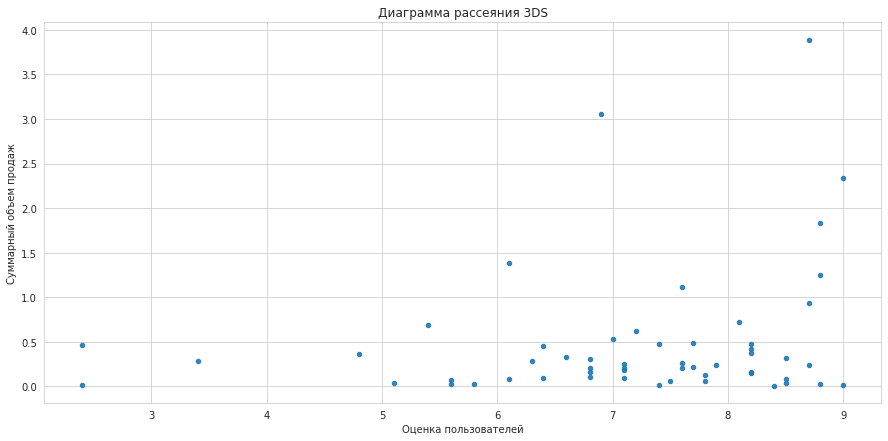

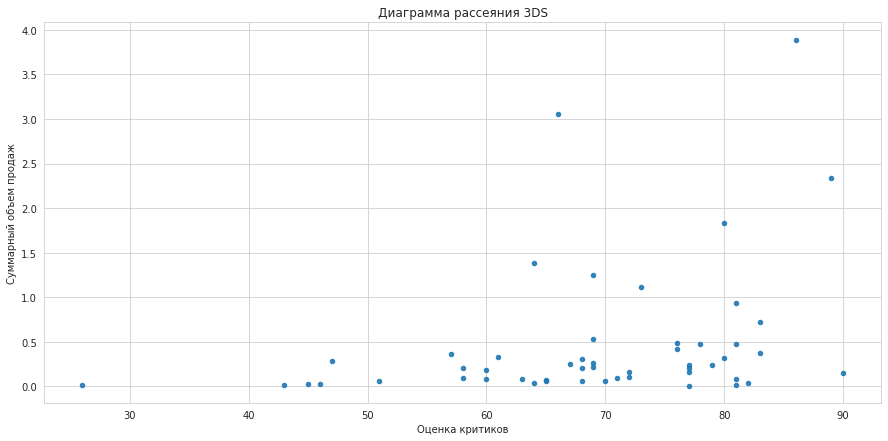

Коэффициент корреляции "оценка пользователей" - платформа "3DS": 0.2151932718527028
Коэффициент корреляции "оценка критиков" - платформа "3DS": 0.314117492869051


In [345]:
# выведем диаграмму рассеияния по платформе 3DS, приняв во внимание отзывы пользователей
actual_data[actual_data['platform']=='3DS'].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.9, figsize=(15,7), grid=True).set_title('Диаграмма рассеяния 3DS');
plt.xlabel("Оценка пользователей");
plt.ylabel("Суммарный объем продаж");
plt.show()

# выведем диаграмму рассеияния по платформе XOne, приняв во внимание отзывы критиков
actual_data[actual_data['platform']=='3DS'].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.9, figsize=(15,7), grid=True).set_title('Диаграмма рассеяния 3DS');
plt.xlabel("Оценка критиков");
plt.ylabel("Суммарный объем продаж");
plt.show()

#вычислим коэффициент корреляции Пирсона в отношении пользовательских оценок для оценки зависимости от общего объема продаж
data_for_3ds_users = actual_data[actual_data['platform']=='3DS']
data_for_3ds_users_cor = data_for_3ds_users['user_score'].corr(data_for_3ds_users['total_sales'])
print('Коэффициент корреляции "оценка пользователей" - платформа "3DS":', data_for_3ds_users_cor)

#вычислим коэффициент корреляции Пирсона в отношении оценок критиков для оценки зависимости от общего объема продаж
data_for_3ds_critics = actual_data[actual_data['platform']=='3DS']
data_for_3ds_critics_cor = data_for_3ds_critics['critic_score'].corr(data_for_3ds_critics['total_sales'])
print('Коэффициент корреляции "оценка критиков" - платформа "3DS":', data_for_3ds_critics_cor)

В отношении платформы "3DS" наблюдается средняя прямая связь между оценками пользователей и критиков и суммарным объемом продаж - 21,5% и 31,4% соответственно.

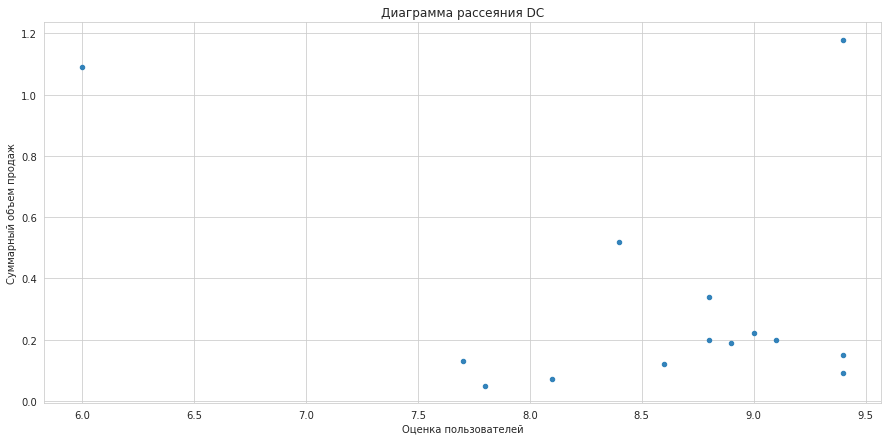

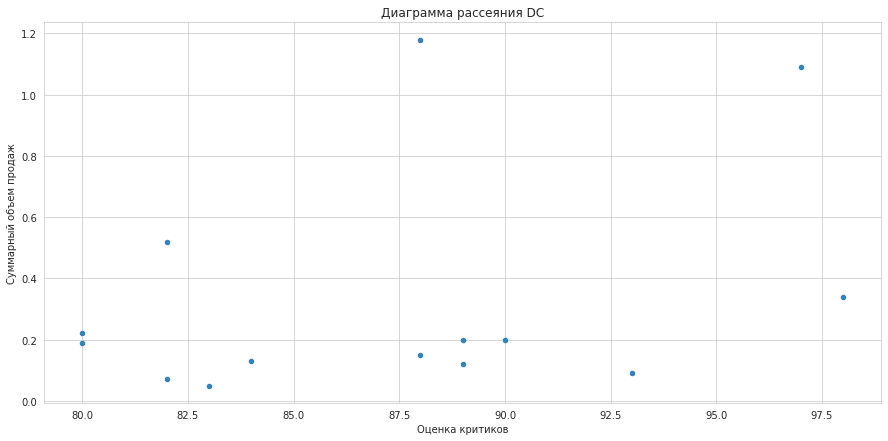

Коэффициент корреляции "оценка пользователей" - платформа "DC": -0.30339915811954116
Коэффициент корреляции "оценка критиков" - платформа "DC": 0.3501266355286984


In [346]:
# выведем диаграмму рассеияния по платформе DC, приняв во внимание отзывы пользователей
data[data['platform']=='DC'].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.9, figsize=(15,7), grid=True).set_title('Диаграмма рассеяния DC');
plt.xlabel("Оценка пользователей");
plt.ylabel("Суммарный объем продаж");
plt.show()

# выведем диаграмму рассеияния по платформе XOne, приняв во внимание отзывы критиков
data[data['platform']=='DC'].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.9, figsize=(15,7), grid=True).set_title('Диаграмма рассеяния DC');
plt.xlabel("Оценка критиков");
plt.ylabel("Суммарный объем продаж");
plt.show()

#вычислим коэффициент корреляции Пирсона в отношении пользовательских оценок для оценки зависимости от общего объема продаж
data_for_dc_users = data[data['platform']=='DC']
data_for_dc_users_cor = data_for_dc_users['user_score'].corr(data_for_dc_users['total_sales'])
print('Коэффициент корреляции "оценка пользователей" - платформа "DC":', data_for_dc_users_cor)

#вычислим коэффициент корреляции Пирсона в отношении оценок критиков для оценки зависимости от общего объема продаж
data_for_dc_critics = data[data['platform']=='DC']
data_for_dc_critics_cor = data_for_dc_critics['critic_score'].corr(data_for_dc_critics['total_sales'])
print('Коэффициент корреляции "оценка критиков" - платформа "DC":', data_for_dc_critics_cor)

В отношении платформы "DC" наблюдается средняя обратная связь между оценками пользователей и критиков и суммарным объемом продаж - 30,3% и 35,0% соответственно.

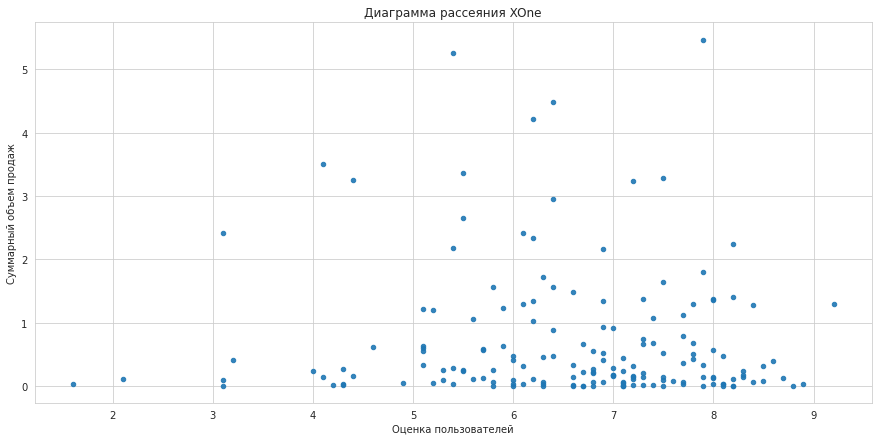

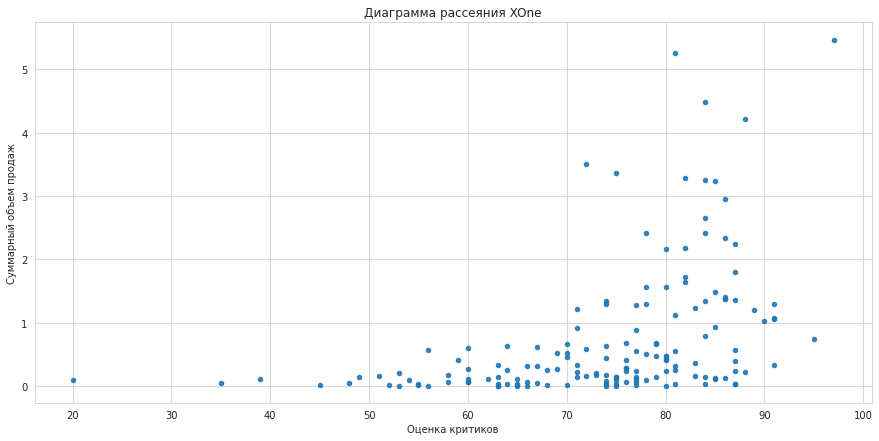

Коэффициент корреляции "оценка пользователей" - платформа "XOne": -0.0703839280647581
Коэффициент корреляции "оценка критиков" - платформа "XOne": 0.42867694370333226


In [347]:
# выведем диаграмму рассеияния по платформе XOne, приняв во внимание отзывы пользователей
actual_data[actual_data['platform']=='XOne'].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.9, figsize=(15,7), grid=True).set_title('Диаграмма рассеяния XOne');
plt.xlabel("Оценка пользователей");
plt.ylabel("Суммарный объем продаж");
plt.show()

# выведем диаграмму рассеияния по платформе XOne, приняв во внимание отзывы критиков
actual_data[actual_data['platform']=='XOne'].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.9, figsize=(15,7), grid=True).set_title('Диаграмма рассеяния XOne');
plt.xlabel("Оценка критиков");
plt.ylabel("Суммарный объем продаж");
plt.show()

#вычислим коэффициент корреляции Пирсона в отношении пользовательских оценок для оценки зависимости от общего объема продаж
data_for_xone_users = actual_data[actual_data['platform']=='XOne']
data_for_xone_users_cor = data_for_xone_users['user_score'].corr(data_for_xone_users['total_sales'])
print('Коэффициент корреляции "оценка пользователей" - платформа "XOne":', data_for_xone_users_cor)

#вычислим коэффициент корреляции Пирсона в отношении оценок критиков для оценки зависимости от общего объема продаж
data_for_xone_critics = actual_data[actual_data['platform']=='XOne']
data_for_xone_critics_cor = data_for_xone_critics['critic_score'].corr(data_for_xone_critics['total_sales'])
print('Коэффициент корреляции "оценка критиков" - платформа "XOne":', data_for_xone_critics_cor)

В отношении платформы "XOne" наблюдается слабая обратная связь между оценками пользователей и средняя прямая связь между оценками критиков и суммарным объемом продаж - 7,0% и 42,8% соответственно.

Таким образом, наличие прямой и обратной связи между суммарной выручкой и оценками пользователей и критиков, говорит о том, как именно сказываются отзывы на приобретении игр на ту или иную платформу. При анализе всех платформ (кроме платформы Wii с сильной прямой связью по оценкам пользователей) было обнаружено, что сильной прямой или обратной связи обнаружено не было, что говорит о том, что оценка пользователей или критиков не оказывает значительного влияния на объемы продаж. 

Тем не менее, при анализе таких платформ, как PC, WiiU, X360, 3DS, XOne, DC, PS4 была обнаружена средняя связь между объема продаж и оценками, что говорит о среднем влиянии на показатель объема продаж. В основном среднее влияние обнаружено между показателем объема продаж и оценкой критиков. 

Наличие обратной связи говорит о том, что что чем выше объем продаж, тем ниже оценка пользователей и наоборот. Благо, таких таких связей между показателями немного, а сама связь является слабой (платформы PC, PS3, PSV, X360, XOne).

Проанализируем общее распределение игр по жанрам и определим, какие жанры являются самыми прибыльными и выделяются ли жанры с высокими и низкими продажами или нет. 

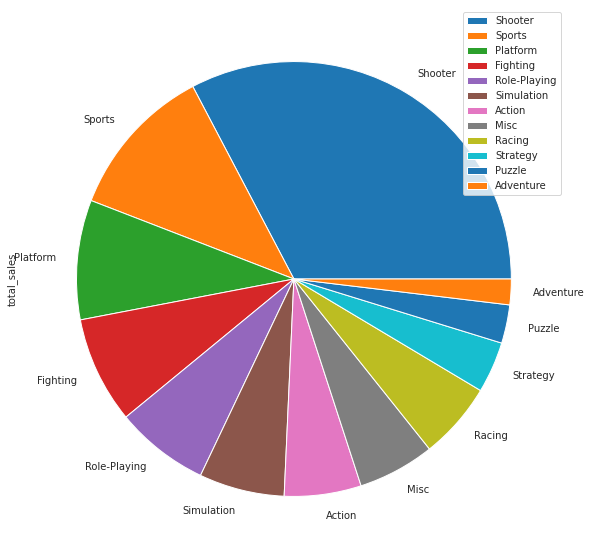

In [348]:
#построим круговую диаграмму для распределения игр по жанрам
actual_data.pivot_table(index ='genre', values='total_sales', aggfunc='median').sort_values(ascending=False, by='total_sales').plot(kind='pie', figsize=(10,10), subplots=True);


In [349]:
#для суммарного вывода объема продаж по жанрам построим сводную таблицу
actual_data.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'median').sort_values(ascending=False, by = 'total_sales').reset_index()

,genre,total_sales
0,Shooter,0.515
1,Sports,0.180
2,Platform,0.140
3,Fighting,0.125
4,Role-Playing,0.110
5,Simulation,0.100
6,Action,0.090
7,Misc,0.090
8,Racing,0.090
9,Strategy,0.060


Как видно из круговой диаграммы, наибольший удельный вес с точки зрения продаж занимают следующие игровые жанры - Shooter, Sports, Platform, Fighting, Role-Playing, а наименьший вес у игровых жанров - Strategy, Puzzle, Adventure.  

### Составление портрета пользователя каждого региона

Для составляения портрета пользователя для каждого региона воспользуемся сводными таблицами и методом plot().

Составим портрет пользователя для региона Северной Америки. 

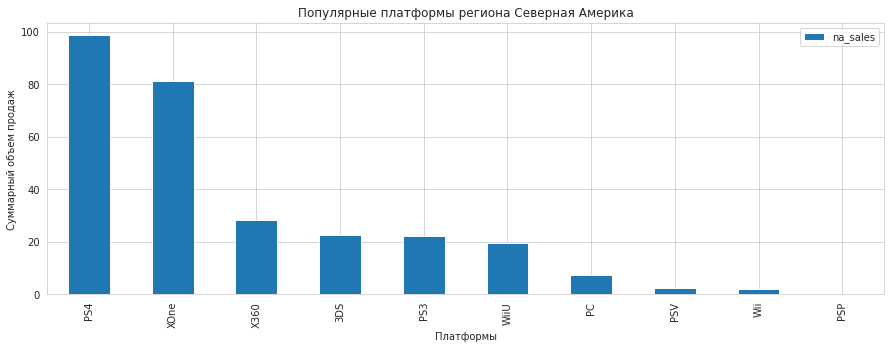

In [350]:
actual_data.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').plot(kind = 'bar', figsize=(15,5)).set_title('Популярные платформы региона Северная Америка');
plt.xlabel("Платформы");
plt.ylabel("Суммарный объем продаж");
plt.show()

Таким образом, наиболее популярными платформами на североамериканском рынке являются PS4 (99 млн.), XOne (81 млн.), X360 (29 млн.), 3DS (22 млн.), PS3 (21 млн.), WiiU (19 млн.), а наименьшую популярность имеют PC (7 млн.), PSV (3 млн.), Wii (2 млн.).

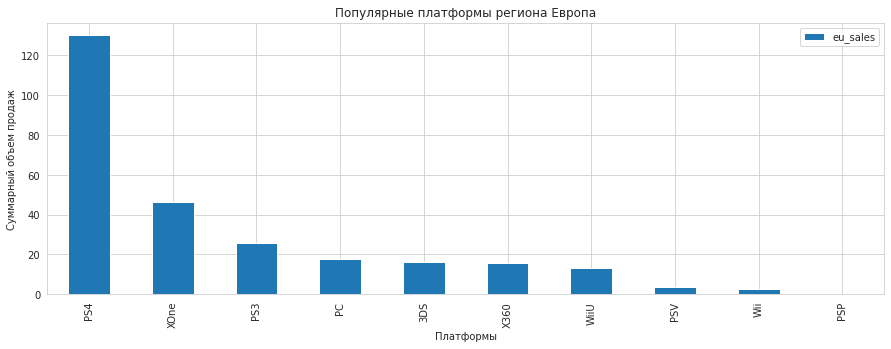

In [351]:
actual_data.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').plot(kind = 'bar', figsize=(15,5)).set_title('Популярные платформы региона Европа');
plt.xlabel("Платформы");
plt.ylabel("Суммарный объем продаж");
plt.show()

Проанализировав платформы на европейском рынке, можно отменить, что наиболее популярными являются PS4 (130 млн.), XOne (47 млн.), PS3 (25 млн.), PC (17 млн.), 3DS (16 млн.), X360 (15 млн.), а наименее популярными - PSV (4 млн.), Wii (2 млн.). 

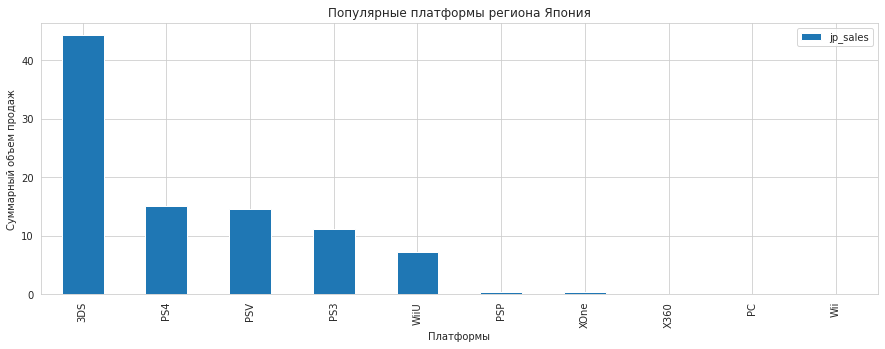

In [352]:
actual_data.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales').plot(kind = 'bar', figsize=(15,5)).set_title('Популярные платформы региона Япония');
plt.xlabel("Платформы");
plt.ylabel("Суммарный объем продаж");
plt.show()

В Японии особой популярностью пользуются игры на платформах 3DS (около 50 млн.), PS4 (около 16 млн.), PSV (около 15 млн.), PS3 (около 12 млн.), WiiU (около 6 млн.), а самая низкая популярность у игр на платформах - PSP (около 0,5 млн.), XOne (около 0,5 млн.).

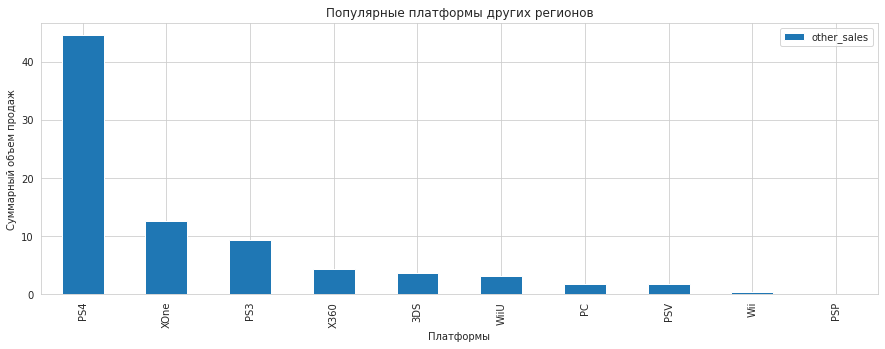

In [353]:
actual_data.pivot_table(index = 'platform', values = 'other_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'other_sales').plot(kind = 'bar', figsize=(15,5)).set_title('Популярные платформы других регионов');
plt.xlabel("Платформы");
plt.ylabel("Суммарный объем продаж");
plt.show()

Проанализировав другие регионы, можно отметить, что с большим отрывом по популярности лидирует платформа PS4 (около 50 млн.), XOne (около 13 млн.), PS3 (около 8 млн.), X360 (около 5 млн.), 3DS (около 4 млн.). Самыми непопулярными платформами среди пользователей оказались WiiU (около 3 млн.), PC и PSV (около 1 млн.), WiiU (менее 0,1 млн.).

Определим наиболее популярные жанры в каждом регионе.

,genre,na_sales
0,Shooter,79.02
1,Action,72.53
2,Sports,46.13
3,Role-Playing,33.47
4,Misc,15.05
5,Fighting,12.43
6,Racing,8.74
7,Platform,6.79
8,Adventure,5.64
9,Simulation,2.63


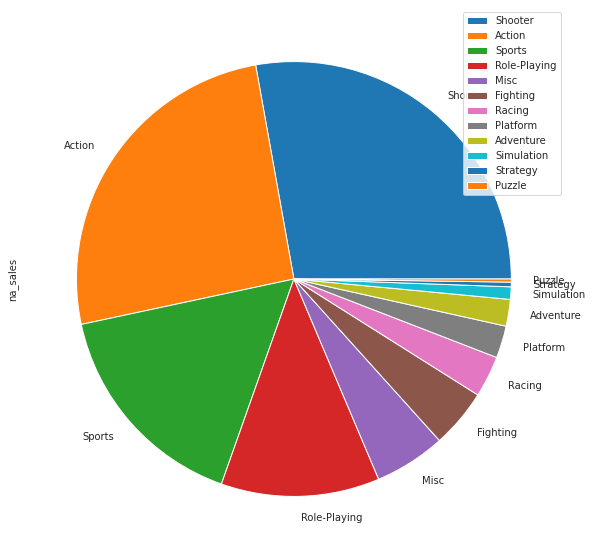

In [362]:
#построим круговую диаграмму для распределения игр по жанрам в регионе Северная Америка
actual_data.pivot_table(index ='genre', values='na_sales', aggfunc='sum').sort_values(ascending=False, by='na_sales').plot(kind='pie', figsize=(10,10), subplots=True);
actual_data.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').reset_index()

Наиболее популярными жанрами в регионе Северная Америка являются Shooter (79,02 млн.), Action (72,53 млн.), Sports (46,13 млн.), Role-Playing (33,47 млн.), Misc (15,05 млн.), а наименее популярными - Platform (6,79 млн.), Adventure (5,64 млн.), Simulation (2,63 млн.), Strategy (0,98 млн.), Puzzle (0,65 млн.). 

,genre,eu_sales
0,Action,74.68
1,Shooter,65.52
2,Sports,45.73
3,Role-Playing,28.17
4,Racing,14.13
5,Misc,12.86
6,Simulation,7.30
7,Platform,6.80
8,Fighting,6.69
9,Adventure,6.49


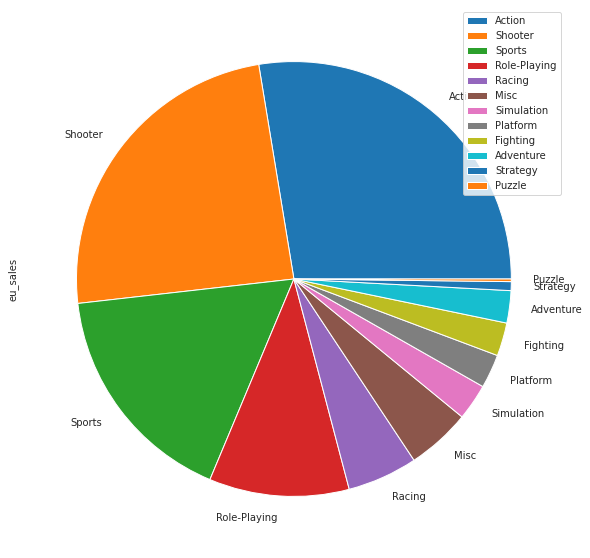

In [363]:
#построим круговую диаграмму для распределения игр по жанрам в регионе Европа
actual_data.pivot_table(index ='genre', values='eu_sales', aggfunc='sum').sort_values(ascending=False, by='eu_sales').plot(kind='pie', figsize=(10,10), subplots=True);
actual_data.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').reset_index()

Наиболее популярными жанрами в регионе Европа являются Action (74,68 млн.), Shooter (65,52 млн.), Sports (45,73 млн.), Role-Playing (28,17 млн.), Racing (14,13 млн.) и Misc (12,86 млн.), а наименее популярными - Platform (6,8 млн.), Fighting (6,69 млн.), Adventure (6,49 млн.), Strategy (1,79 млн.), Puzzle (0,52 млн.).

,genre,jp_sales
0,Role-Playing,31.16
1,Action,29.58
2,Fighting,6.37
3,Misc,5.61
4,Shooter,4.87
5,Adventure,3.60
6,Sports,3.26
7,Platform,2.69
8,Simulation,2.31
9,Racing,1.76


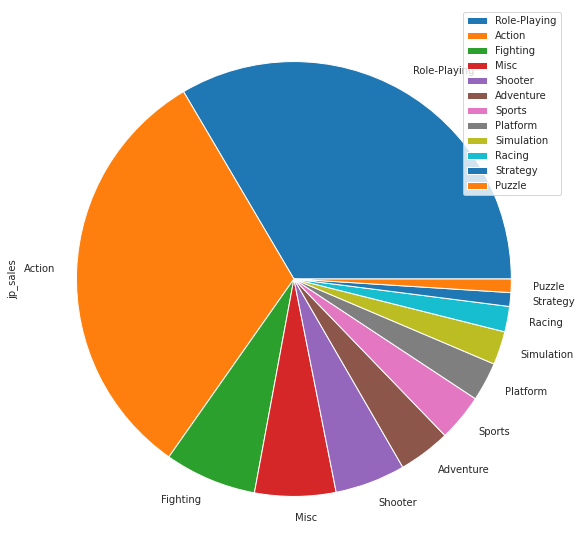

In [356]:
#построим круговую диаграмму для распределения игр по жанрам в регионе Япония
actual_data.pivot_table(index ='genre', values='jp_sales', aggfunc='sum').sort_values(ascending=False, by='jp_sales').plot(kind='pie', figsize=(10,10), subplots=True);
actual_data.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales').reset_index()

Наиболее популярными жанрами в регионе Япония являются Role-Playing (31,16 млн.), Action (29,58 млн.), Fighting (6,37 млн.), Misc (5,61 млн.), Shooter (4,87 млн.), Adventure (3,60 млн.), а наименее популярными - Platform (2,69 млн.), Simulation (2,31 млн.), Racing (1,76 млн.), Strategy (0,95 млн.), Puzzle (0,93 млн.).

,genre,other_sales
0,Action,22.57
1,Shooter,21.53
2,Sports,14.36
3,Role-Playing,8.64
4,Misc,4.03
5,Racing,2.89
6,Fighting,2.73
7,Adventure,1.82
8,Platform,1.81
9,Simulation,0.89


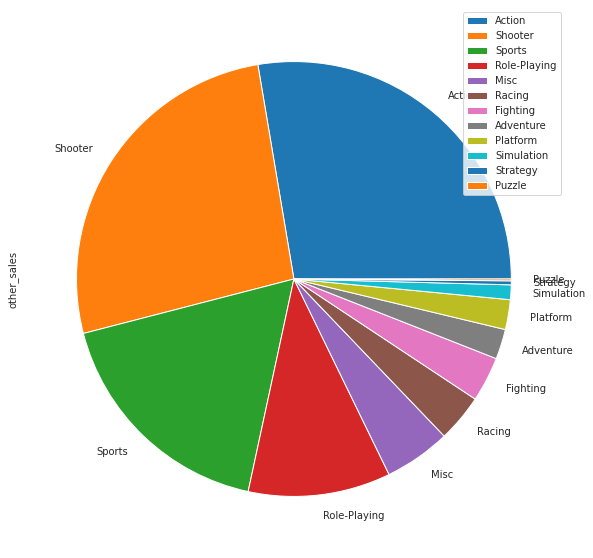

In [357]:
#построим круговую диаграмму для распределения игр по жанрам в остальных регионах
actual_data.pivot_table(index ='genre', values='other_sales', aggfunc='sum').sort_values(ascending=False, by='other_sales').plot(kind='pie', figsize=(10,10), subplots=True);
actual_data.pivot_table(index = 'genre', values = 'other_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'other_sales').reset_index()

Наиболее популярными жанрами в остальных регионах являются Action (22,57 млн.), Shooter (21,53 млн.), Sports (14,36 млн.), Role-Playing (8,64 млн.), Misc (4,03 млн.), а наименее популярными - Adventure (1,82 млн.), Platform (1,81 млн.), Simulation (0,89 млн.), Strategy (0,24 млн.), Puzzle (0,11 млн.).

Таким образом, в каждом из регионов в топе популярных жанров присутствуют Action, Sports, Shooter. Далее, в зависимости от региона предпочтения по играм существенно меняются, так в Северной Америке предпочитают Misc и Role-Playing, в Японии наряду с перечисленными жанрами предпочитают Fighting, а в остальных регионах отдают предпочтение Role-Playing и Racing.

Проверим, влияет ли рейтинг ESRB на продажи в каждом отдельном регионе.

In [358]:
rating_ESRB = actual_data.pivot_table(index = 'rating', values = ['eu_sales','jp_sales','na_sales','other_sales'], aggfunc = 'sum').reset_index()
rating_ESRB

,rating,eu_sales,jp_sales,na_sales,other_sales
0,E,58.06,8.94,50.74,15.39
1,E10+,26.16,4.46,33.23,7.83
2,M,93.44,8.01,96.42,28.67
3,T,34.07,14.78,38.95,11.33
4,unknown,58.95,56.90,64.72,18.40


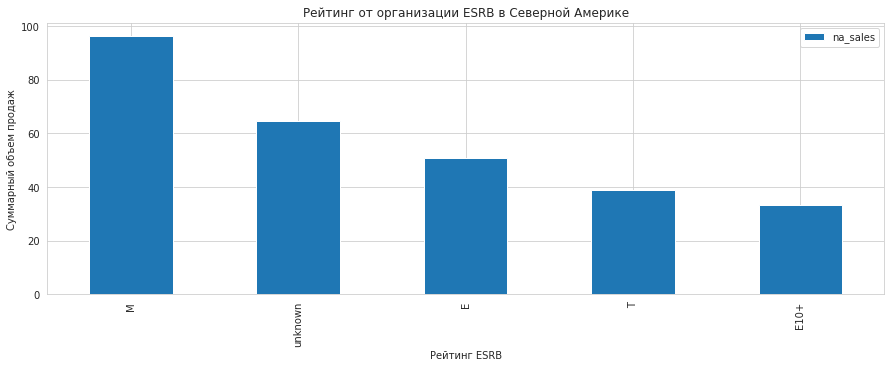

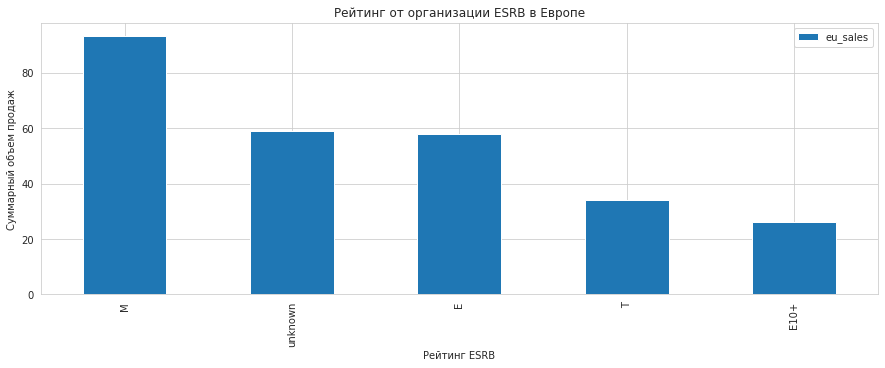

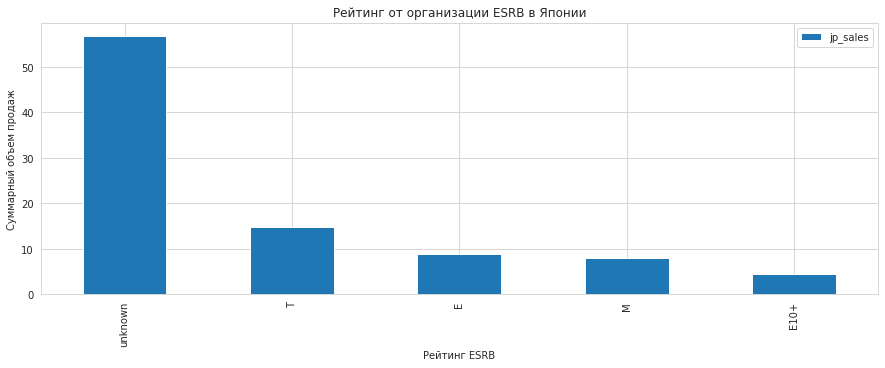

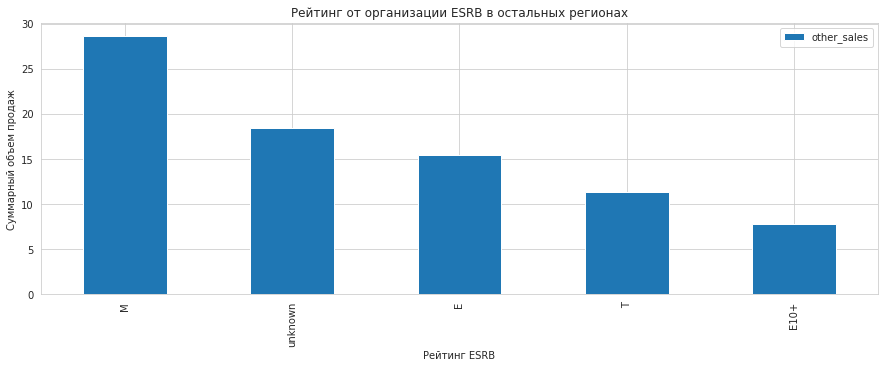

In [359]:
#Рейтинг от организации ESRB в Северной Америке
actual_data.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').plot(kind = 'bar', figsize=(15,5)).set_title('Рейтинг от организации ESRB в Северной Америке');
plt.xlabel("Рейтинг ESRB");
plt.ylabel("Суммарный объем продаж");
plt.show()

#Рейтинг от организации ESRB в Европе
actual_data.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').plot(kind = 'bar', figsize=(15,5)).set_title('Рейтинг от организации ESRB в Европе');
plt.xlabel("Рейтинг ESRB");
plt.ylabel("Суммарный объем продаж");
plt.show()

#Рейтинг от организации ESRB в Японии
actual_data.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales').plot(kind = 'bar', figsize=(15,5)).set_title('Рейтинг от организации ESRB в Японии');
plt.xlabel("Рейтинг ESRB");
plt.ylabel("Суммарный объем продаж");
plt.show()

#Рейтинг от организации ESRB в остальных регионах
actual_data.pivot_table(index = 'rating', values = 'other_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'other_sales').plot(kind = 'bar', figsize=(15,5)).set_title('Рейтинг от организации ESRB в остальных регионах');
plt.xlabel("Рейтинг ESRB");
plt.ylabel("Суммарный объем продаж");
plt.show()

Как видно из графиков выше, рейтинг ESRB влияет на продажи в каждом отдельном регионе. Так, в Северной Америке, Европе и остальных регионах более всего продаются игры с рейтингом M, E, T, в Японии - игры с рейтингом T, E, M. Игры с рейтингом E10+, как правило, занимают последнее и предпоследнее место в суммарном объеме продаж. Также следуем обратить внимание, что в таблице с данными очень много пропущенных значений - значения "unknown".  

### Проверка гипотез

В данном исследовании перед нами стоит задача проверить следующие гипотезы:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. 

Помимо проверки, необходимо также сформулировать нулевую и альтернативные гипотезы и осуществить их проверку. 

Начнем с проверки гипотезы, что пользовательские рейтинги платформ Xbox One и PC одинаковые. Для проверки данной гипотезы  в качестве нулевой примем H0: "средние рейтинги по платформам Xbox One и PC одинаковые" и в качестве альтернативной гипотезы мы примем H1: "средние рейтинги по платформам Xbox One и PC разные". В качестве значения alpha примем 0.05. Хотя в теории и на практике для alpha может использоваться много чисел, наиболее часто используется 0,05. Причина этого заключается в том, что этот уровень подходит во многих случаях, и исторически он был принят в качестве стандарта. Однако существует много ситуаций, когда следует использовать меньшее значение alpha . Не существует единого значения альфа, которое всегда определяло бы статистическую значимость.


In [364]:
#создадим две переменные с названиями анализируемых платформ
xone_data = actual_data[actual_data['platform'] == 'XOne']['user_score']
pc_data = actual_data[actual_data['platform'] == 'PC']['user_score']
# в качестве критического уровня статистической значимости установим 0.05 - если p-value < критического, то отвергаем гипотезу, если >, то не отвергаем
alpha = .05
results = st.ttest_ind(xone_data, pc_data)
print('p-значение:', round(results.pvalue, 4))
if (results.pvalue<alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: nan
Не получилось отвергнуть нулевую гипотезу


При значении alpha = 0.05 нулевая гипотеза не отвергается, однако если понизить значение aplha до 0.01, то будет иметь место альтернативная гипотеза. Однако, как и было указано выше, зачастую берут alpha = 0.05, что означает уровень достоверности результата составляет 95%. 

Напомним, что для целей данного исследования пропуски в столбцах user_score и critic_score заполнялись медианными значениями, следовательно, использование более низкого значения alpha в данном случае нецелесообразно, т.к. уровень достоверности в данном случае при использовании медианных значений не может быть более 95%. 

Далее проверим гипотезу, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. В качестве нулевой примем H0: "средние рейтинги жанров Action и Sports разные" и в качестве альтернативной гипотезы мы примем H1: "средние рейтинги жанров Action и Sports одинаковые". Коэффициент alpha также установим равным 0.05. 

In [365]:
#создадим две переменные с названиями анализируемых жанров
data_action = actual_data[actual_data['genre'] == 'Action']['user_score']
data_sports = actual_data[actual_data['genre'] == 'Sports']['user_score']
# в качестве критического уровня статистической значимости установим 0.05 - если p-value < критического, то отвергаем гипотезу, если >, то не отвергаем
alpha = .05
results = st.ttest_ind(data_action, data_sports)
print('p-значение:', round(results.pvalue, 2))
if (results.pvalue<alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: nan
Не получилось отвергнуть нулевую гипотезу


Таким образом, мы проверили обе гипотезы и получили следующие результаты: 
- "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" - не получилось отвергнуть нулевую гипотезу, что означает что средние пользовательские рейтинги у платформ одинаковые. 
- "Средние пользовательские рейтинги жанров Action и Sports разные" - не получилось отвергнуть нулевую гипотезу, что означает, что средние пользовательские рейтинги жанров Action и Sports разные. 

### Общий вывод

В результате выполнения исследования были сделаны следующие выводы: 

1) Наибольшее количество игр выпускалось в период с 2003 по 2016 гг. (от 550 до 1450 игр в год). При этом наибольшее количество игр было выпущено в 2008 - 2011 гг. (от 1050 до 1450 игр в год), а наименьшее количество игр - в период с 1980 по 1994 гг. (от 9 до 160 игр в год). Платформами с наибольшими суммарными продажами являются GB, NES, GEN, SNES, PS4, X360 и т.д. Однако следует обратить внимание, что в данном графике представлены платформы, начиная с 1980 г. и заканчивая 2016 г. Также видно, что такие прибыльные платформы, как NES, GB, SNES, GEN прекратили свое существование в конце 1990-х - начале 2000-х гг, продержавшись на рынке от 2 до 13 лет. Ограничив выборку периодом от 1995 до 2016 гг., было выявлено, что наиболее прибыльными платформами в заданный период были платформы: PS4, X360, PS3, Wii, N64, XOne, PS2, WiiU, PS, 3DS. Характерный срок за который появляются новые и исчезают старые платформы составляет в среднем - 9-10 лет. В 2012-2013 гг. появились сразу две популярные платформы - XOne и PS4, пик продаж у которых приходился приблизительно на один и тот же период - 2015 г.

2) Наиболее прибыльными платформами являются PS4, XOne, 3DS, X360, WiiU. Наиболее интересными с точки зрения прибыльности и роста являются платформы - PS4, XOne, 3DS, X360, WiiU. Диаграмма с усами показывает, что выделяются платформы - PS4, XOne, Wii, X360, PS3 и WiiU.

3) Наличие прямой и обратной связи между суммарной выручкой и оценками пользователей и критиков, говорит о том, как именно сказываются отзывы на приобретении игр на ту или иную платформу. При анализе всех платформ (кроме платформы Wii с сильной прямой связью по оценкам пользователей) было обнаружено, что сильной прямой или обратной связи обнаружено не было, что говорит о том, что оценка пользователей или критиков не оказывает значительного влияния на объемы продаж. Тем не менее, при анализе таких платформ, как PC, WiiU, X360, 3DS, XOne, DC, PS4 была обнаружена средняя связь между объема продаж и оценками, что говорит о среднем влиянии на показатель объема продаж. В основном среднее влияние обнаружено между показателем объема продаж и оценкой критиков. Наличие обратной связи говорит о том, что что чем выше объем продаж, тем ниже оценка пользователей и наоборот. Благо, таких таких связей между показателями немного, а сама связь является слабой (платформы PC, PS3, PSV, X360, XOne).

4) Наибольший удельный вес с точки зрения продаж занимают следующие игровые жанры - Shooter, Sports, Platform, Fighting, Role-Playing, а наименьший вес у игровых жанров - Strategy, Puzzle, Adventure. 

5) Наиболее популярными платформами на североамериканском рынке являются PS4, XOne, X360, 3DS, PS3, WiiU, а наименьшую популярность имеют PC, PSV, Wii. Наиболее на европейском рынке популярными являются PS4, XOne, PS3, PC, 3DS, X360, а наименее популярными - PSV, Wii. В Японии особой популярностью пользуются игры на платформах 3DS, PS4, PSV, PS3, WiiU, а самая низкая популярность у игр на платформах - PSP, XOne. В остальных регионах с большим отрывом по популярности лидирует платформа PS4, на втором месте - XOne, далее идут - PS3, X360, 3DS. Самыми непопулярными платформами среди пользователей оказались Wii, PC, PSV, WiiU.

6) Наиболее популярными жанрами в регионе Северная Америка являются Shooter, Action, Sports, Role-Playing, Misc, а наименее популярными - Platform, Adventure, Simulation, Strategy, Puzzle. Наиболее популярными жанрами в регионе Европа являются Action, Shooter, Sports, Role-Playing, Racing и Misc, а наименее популярными - Platform, Fighting, Adventure, Strategy, Puzzle. Наиболее популярными жанрами в регионе Япония являются Role-Playing, Action, Fighting, Misc, Shooter, Adventure, а наименее популярными - Platform, Simulation, Racing, Strategy, Puzzle. Наиболее популярными жанрами в остальных регионах являются Action, Shooter, Sports, Role-Playing, Misc, а наименее популярными - Adventure, Platform, Simulation, Strategy, Puzzle. Таким образом, в каждом из регионов в топе популярных жанров присутствуют Action, Sports, Shooter. Далее, в зависимости от региона предпочтения по играм существенно меняются, так в Северной Америке предпочитают Misc и Role-Playing, в Японии наряду с перечисленными жанрами предпочитают Fighting, а в остальных регионах отдают предпочтение Role-Playing и Racing.

7) Рейтинг ESRB влияет на продажи в каждом отдельном регионе. Так, в Северной Америке, Европе и остальных регионах более всего продаются игры с рейтингом M, E, T, в Японии - игры с рейтингом T, E, M. Игры с рейтингом E10+, как правило, занимают последнее и предпоследнее место в суммарном объеме продаж. Также следуем обратить внимание, что в таблице с данными очень много пропущенных значений - значения "unknown".

8) В результате исследования были проверены гипотезы и получены следующие результаты:
- "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" - не получилось отвергнуть нулевую гипотезу, что означает что средние пользовательские рейтинги у платформ одинаковые.
- "Средние пользовательские рейтинги жанров Action и Sports разные" - не получилось отвергнуть нулевую гипотезу, что означает, что средние пользовательские рейтинги жанров Action и Sports разные.